In [291]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [292]:
# Images path
folder_color = 'dataset/color'
folder_gray = 'dataset/grayscale'
folder_segmented = 'dataset/segmented'

# Gets the name of all folders in the directory
sub_folders_color = [name for name in os.listdir(folder_color)]
sub_folders_gray = [name for name in os.listdir(folder_gray)]
sub_folders_segmented = [name for name in os.listdir(folder_segmented)]


In [293]:
# Gets the number of items inside each folder in the directory

nums_color = []
nums_gray = []
nums_segmented = []

for name in sub_folders_color:
    nums_color.append(len(os.listdir(folder_color + "/" + name)))
for name in sub_folders_gray:
    nums_gray.append(len(os.listdir(folder_gray + "/" + name)))
for name in sub_folders_segmented:
    nums_segmented.append(len(os.listdir(folder_segmented + "/" + name)))


In [295]:
# Organize the data into DataFrames
df_color = pd.DataFrame()
df_color['Name'] = sub_folders_color
df_color['Count'] = nums_color
df_color['Dataset'] = 'color'

df_gray = pd.DataFrame()
df_gray['Name'] = sub_folders_gray
df_gray['Count'] = nums_gray
df_gray['Dataset'] = 'grayscale'

df_segmented = pd.DataFrame()
df_segmented['Name'] = sub_folders_segmented
df_segmented['Count'] = nums_segmented
df_segmented['Dataset'] = 'segmented'


In [297]:
# Add the 3 similar daaframes together
df = pd.concat([df_color, df_gray, df_segmented], ignore_index=True)


df['Plant'] = df.Name.str.split(pat='__').str[0] # getting the name of the plant
df['Status'] = df.Name.str.split(pat='__').str[1] # getting the disease of the plant
df.Plant.unique()


array(['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)',
       'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry',
       'Soybean', 'Squash', 'Strawberry', 'Tomato'], dtype=object)

In [298]:
df.Plant.replace(to_replace=['Cherry_(including_sour)','Corn_(maize)', 'Pepper,_bell'], 
                 value=['Cherry', 'Corn', 'Bell pepper'], inplace=True)

df.Status.unique()


array(['_Apple_scab', '_Black_rot', '_Cedar_apple_rust', '_healthy',
       '_Powdery_mildew', '_Cercospora_leaf_spot Gray_leaf_spot',
       '_Common_rust_', '_Northern_Leaf_Blight', '_Esca_(Black_Measles)',
       '_Leaf_blight_(Isariopsis_Leaf_Spot)',
       '_Haunglongbing_(Citrus_greening)', '_Bacterial_spot',
       '_Early_blight', '_Late_blight', '_Leaf_scorch', '_Leaf_Mold',
       '_Septoria_leaf_spot', '_Spider_mites Two-spotted_spider_mite',
       '_Target_Spot', '_Tomato_mosaic_virus',
       '_Tomato_Yellow_Leaf_Curl_Virus'], dtype=object)

In [299]:
df.Status.replace(to_replace = ['_Apple_scab', '_Black_rot', '_Cedar_apple_rust', '_healthy',
       '_Powdery_mildew', '_Cercospora_leaf_spot Gray_leaf_spot',
       '_Common_rust_', '_Northern_Leaf_Blight', '_Esca_(Black_Measles)',
       '_Leaf_blight_(Isariopsis_Leaf_Spot)',
       '_Haunglongbing_(Citrus_greening)', '_Bacterial_spot',
       '_Early_blight', '_Late_blight', '_Leaf_scorch', '_Leaf_Mold',
       '_Septoria_leaf_spot', '_Spider_mites Two-spotted_spider_mite',
       '_Target_Spot', '_Tomato_mosaic_virus',
       '_Tomato_Yellow_Leaf_Curl_Virus'],
value = ['Apple scab', 'Black rot', 'Cedar apple rust', 'Healthy',
       'Powdery mildew', 'Gray leaf spot',
       'Common rust', 'Northern leaf blight', 'Esca (Black Measles)',
       'Isariopsis leaf spot',
       'Citrus greening', 'Bacterial spot',
       'Early blight', 'Late blight', 'Leaf scorch', 'Leaf mold',
       'Septoria leaf spot', 'Two-spotted spider mites',
       'Target spot', 'Mosaic virus',
       'Yellow leaf curl virus'], 
 inplace=True)
df.head(10)


,Name,Count,Dataset,Plant,Status
0,Apple___Apple_scab,630,color,Apple,Apple scab
1,Apple___Black_rot,621,color,Apple,Black rot
2,Apple___Cedar_apple_rust,275,color,Apple,Cedar apple rust
3,Apple___healthy,1645,color,Apple,Healthy
4,Blueberry___healthy,1502,color,Blueberry,Healthy
5,Cherry_(including_sour)___healthy,854,color,Cherry,Healthy
6,Cherry_(including_sour)___Powdery_mildew,1052,color,Cherry,Powdery mildew
7,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,513,color,Corn,Gray leaf spot
8,Corn_(maize)___Common_rust_,1192,color,Corn,Common rust
9,Corn_(maize)___healthy,1162,color,Corn,Healthy


In [300]:
df.sort_values(by = 'Name')

,Name,Count,Dataset,Plant,Status
0,Apple___Apple_scab,630,color,Apple,Apple scab
76,Apple___Apple_scab,630,segmented,Apple,Apple scab
38,Apple___Apple_scab,630,grayscale,Apple,Apple scab
1,Apple___Black_rot,621,color,Apple,Black rot
77,Apple___Black_rot,621,segmented,Apple,Black rot
...,...,...,...,...,...
74,Tomato___Tomato_mosaic_virus,373,grayscale,Tomato,Mosaic virus
112,Tomato___Tomato_mosaic_virus,373,segmented,Tomato,Mosaic virus
106,Tomato___healthy,1591,segmented,Tomato,Healthy
30,Tomato___healthy,1591,color,Tomato,Healthy


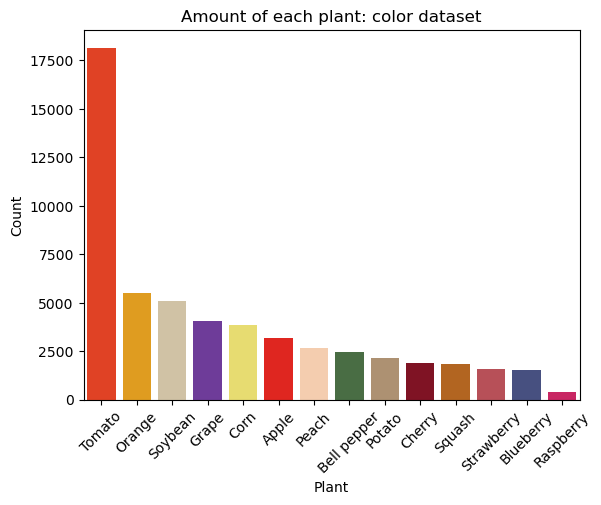

In [301]:
# Count 'color'

df_g = df.loc[(df.Dataset == 'color')].groupby('Plant').agg({'Count': 'sum'}).sort_values(by='Count', ascending=False)
colors = ['#ff2c06', '#FFA500', '#d7c49e', '#6f2da8', '#fbec5d', '#ff0800', '#ffcba4', '#44743d', '#b79268', 
          '#910118', '#CA6309', '#c83f49', '#3E4989', '#E30B5C']
sns.barplot(x=df_g.index, y=df_g.Count, palette=colors)
plt.xticks(rotation=45)
plt.title('Amount of each plant: color dataset');

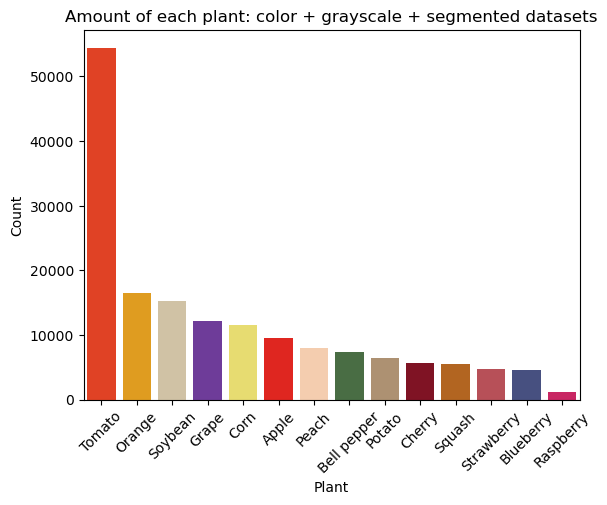

In [302]:
# Count all

df_g = df.groupby('Plant').agg({'Count': 'sum'}).sort_values(by='Count', ascending=False)
colors = ['#ff2c06', '#FFA500', '#d7c49e', '#6f2da8', '#fbec5d', '#ff0800', '#ffcba4', '#44743d', '#b79268', 
          '#910118', '#CA6309', '#c83f49', '#3E4989', '#E30B5C']
sns.barplot(x=df_g.index, y=df_g.Count, palette=colors)
plt.xticks(rotation=45)
plt.title('Amount of each plant: color + grayscale + segmented datasets');

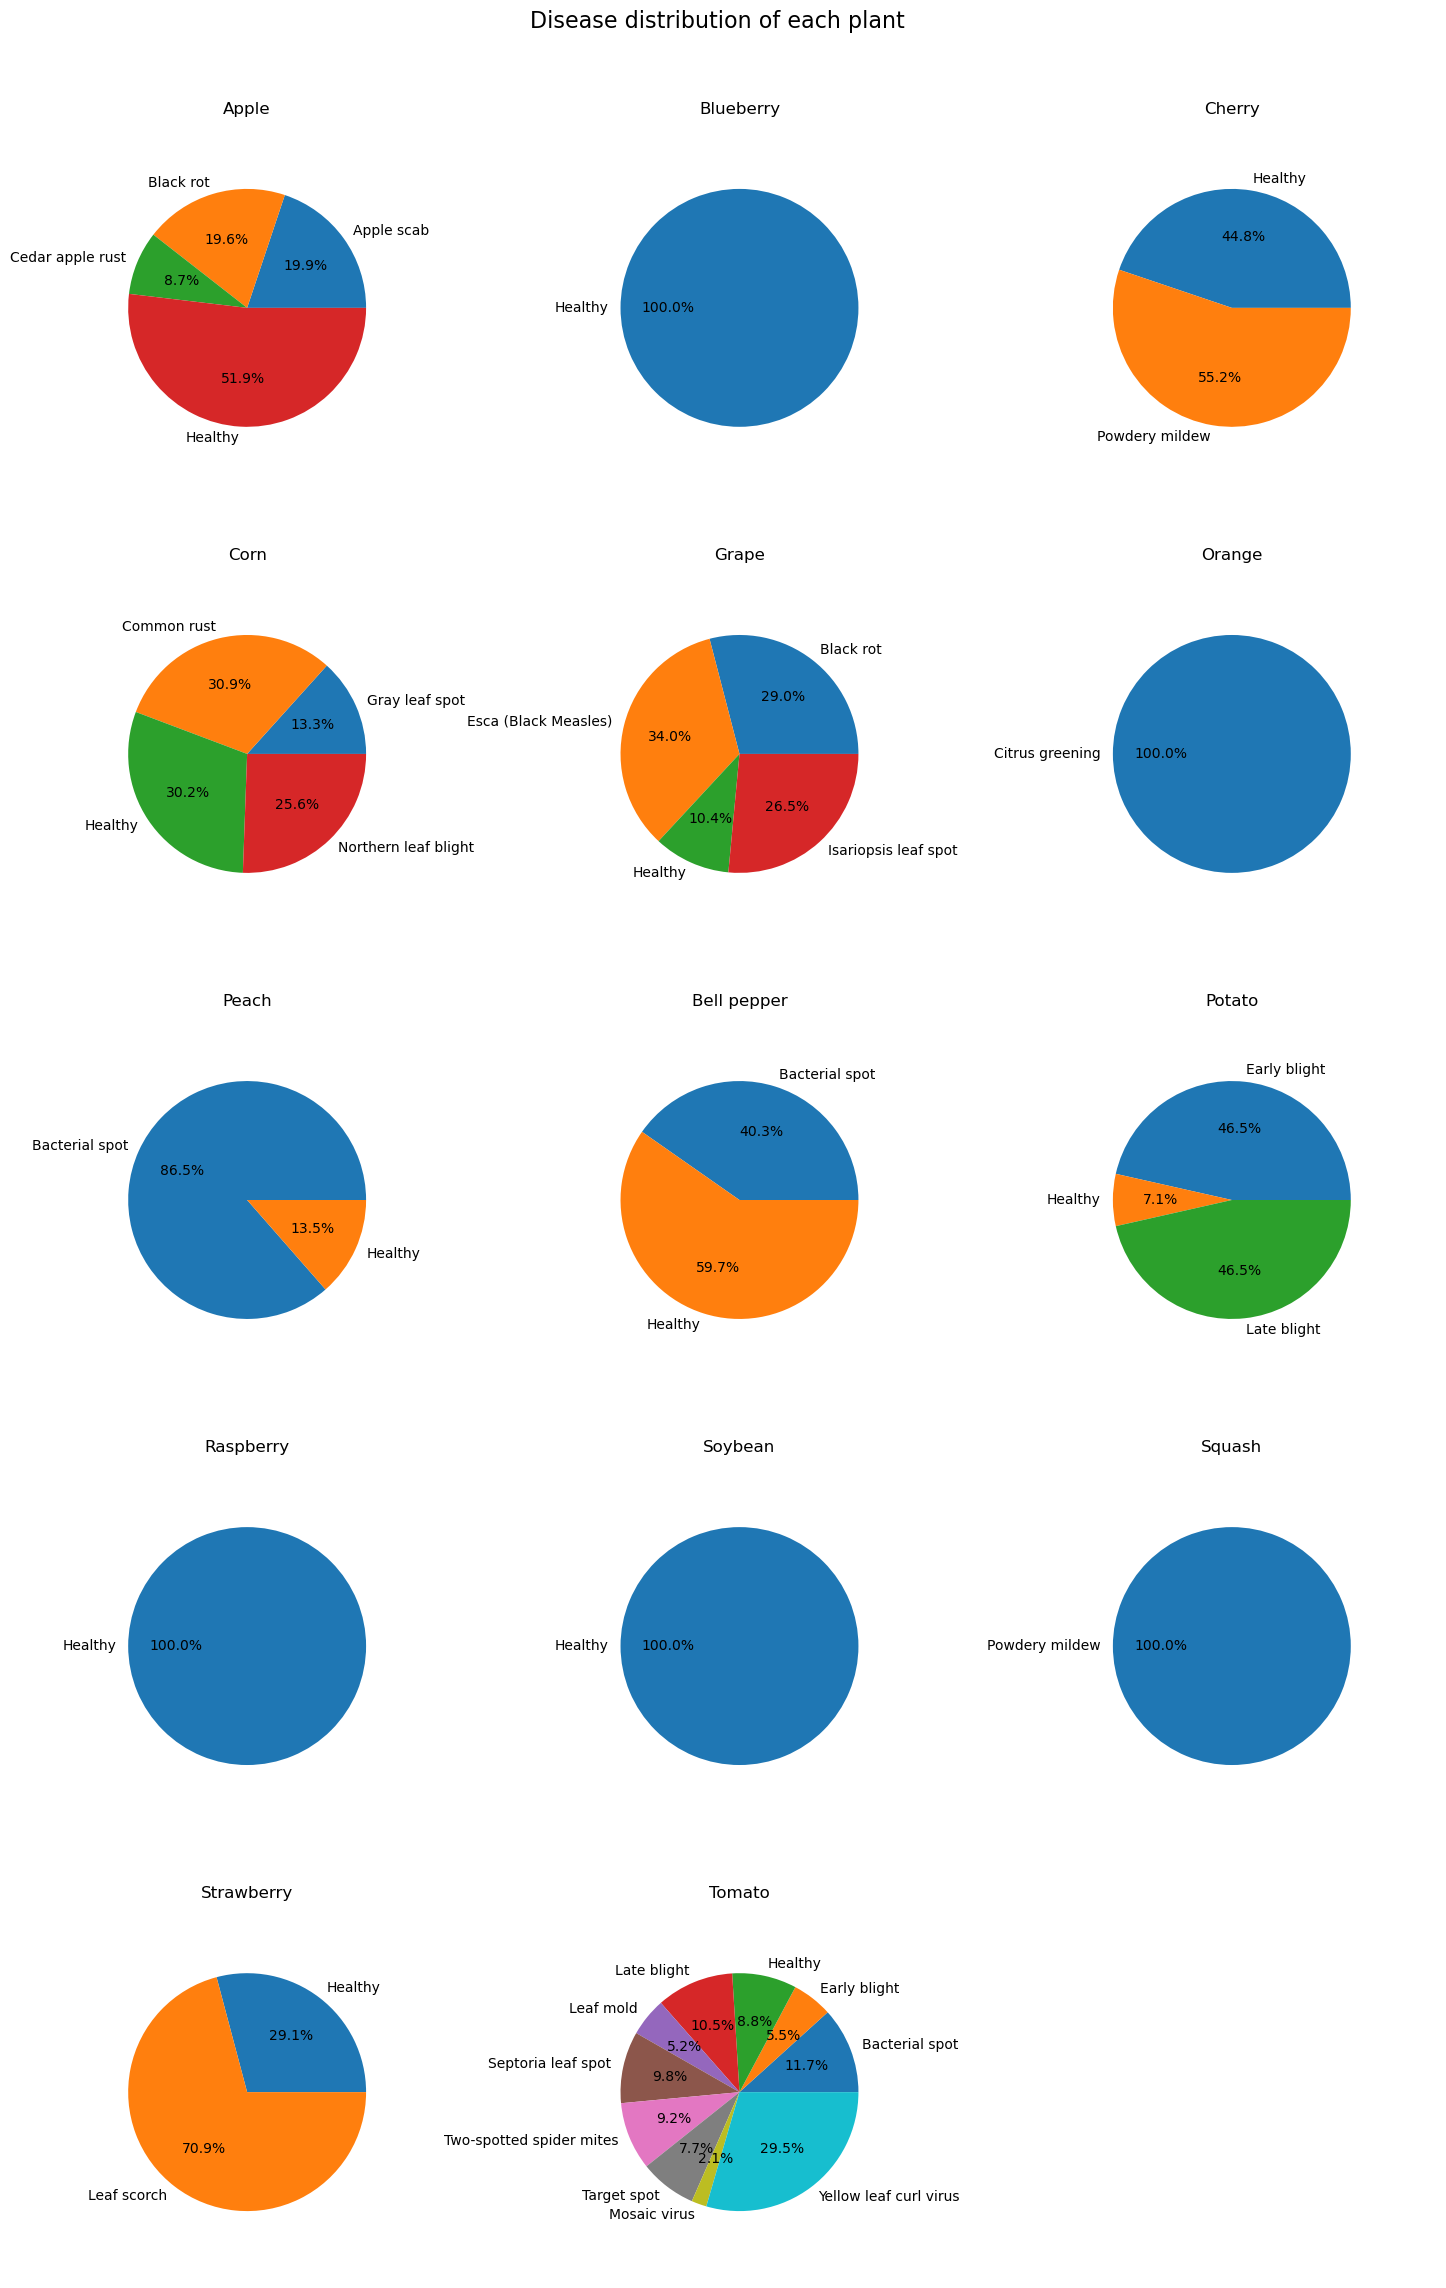

In [305]:
# Creates a dictionary with each plant and the possible diseases
dic = {}
for plant in df.Plant.unique():
    dic[plant] = df.loc[(df.Plant == plant)].Status.unique()
    
# Pie charts for each plant with their diseases

f, axes = plt.subplots(5, 3, figsize=(18, 28))
plt.suptitle('Disease distribution of each plant', fontsize=16, y=0.92)
col = 0
row = 0
for plant in dic:
    count = []
    for status in dic.get(plant):
        count.append(df.loc[(df.Plant == plant) & (df.Status == status), 'Count'].values[0])
    axes[row, col].pie(count, labels=dic.get(plant),  autopct='%1.1f%%', radius=0.8)
    axes[row, col].set_title(plant);
    col += 1
    if col%3 == 0:
        col = 0
        row += 1
       
axes[4,2].set_axis_off()



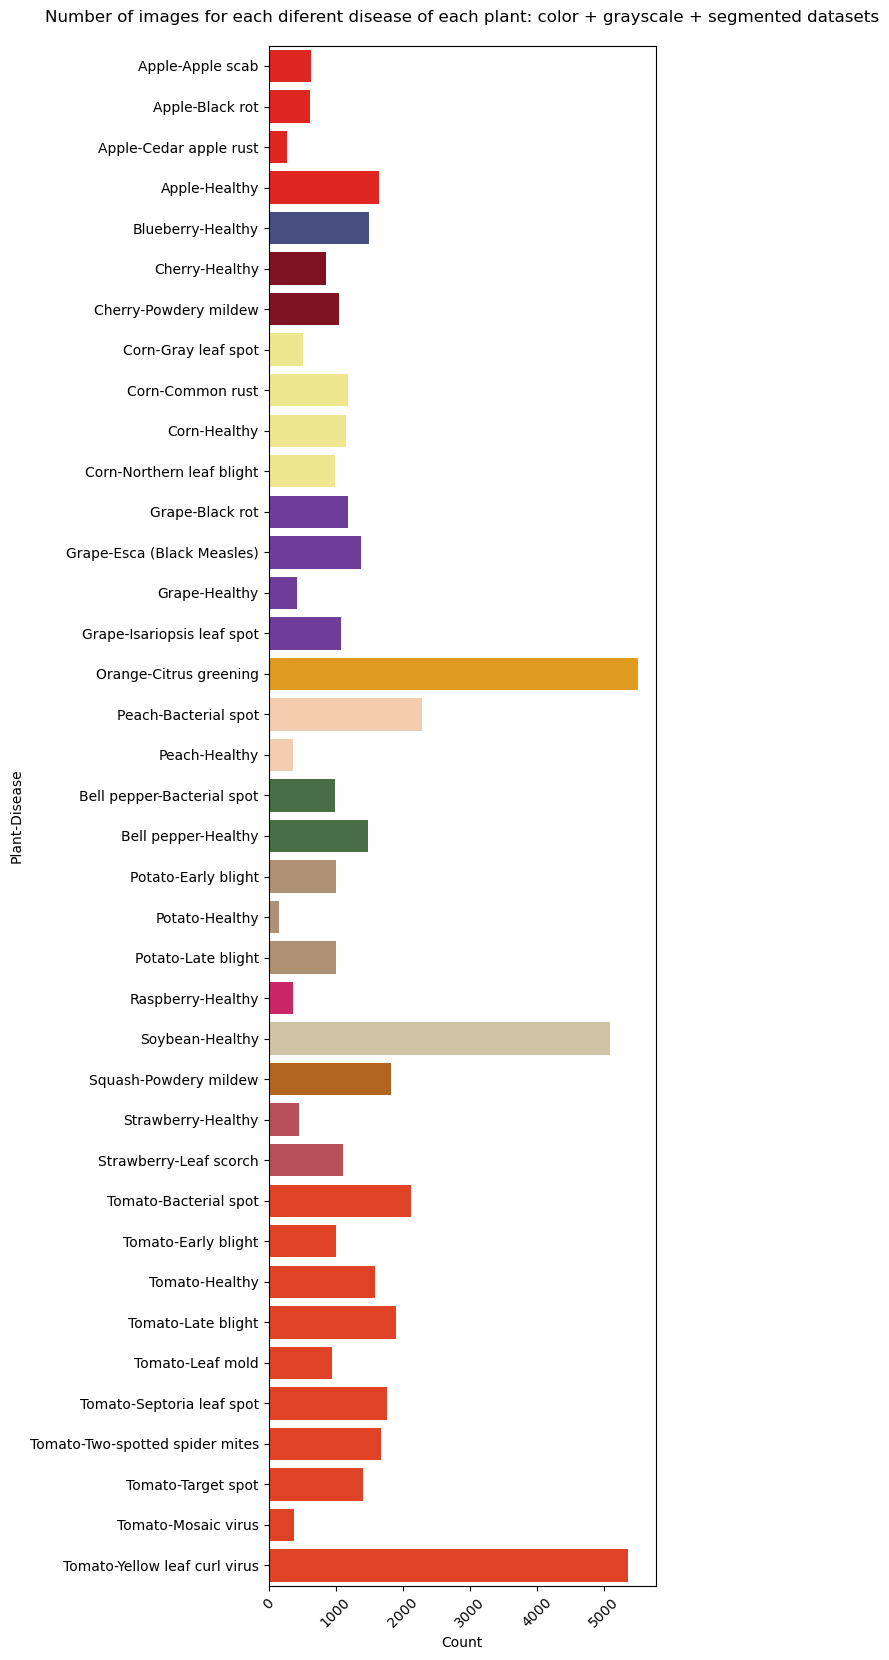

In [306]:
# color + grayscale + segmented

df['Plantstat'] = df['Plant'] + '-' + df['Status']

colors = ['#ff0800', '#ff0800', '#ff0800', '#ff0800', '#3E4989', '#910118', '#910118', '#FFF380',
          '#FFF380', '#FFF380', '#FFF380', '#6f2da8', '#6f2da8', '#6f2da8', '#6f2da8','#FFA500',
          '#ffcba4', '#ffcba4', '#44743d', '#44743d', '#b79268', '#b79268', '#b79268','#e30b5d',
          '#d7c49e', '#CA6309', '#c83f49', '#c83f49', '#ff2c06', '#ff2c06', '#ff2c06', '#ff2c06',
          '#ff2c06', '#ff2c06', '#ff2c06', '#ff2c06', '#ff2c06', '#ff2c06']
plt.figure(figsize=(5,20))
sns.barplot(y=df.Plantstat, x=df.Count, palette = colors)
plt.xticks(rotation=45);
plt.title('Number of images for each diferent disease of each plant: color + grayscale + segmented datasets', y = 1.01)
plt.ylabel('Plant-Disease');